In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [74]:
def get_ipea_serie(serie_id):
  url = 'http://ipeadata.gov.br/exibeserie.aspx?serid={}'.format(serie_id)
  return url

In [81]:
url = get_ipea_serie(serie_id=1256135712)
web = requests.get(url)
soup = BeautifulSoup(web.text, 'html.parser')

In [82]:
exportacoes = []
periodo = []

for i in soup.find_all('td',{'align':'right'}):
  i = i.get_text()
  exportacoes.append(i)
for y in soup.find_all('td', {'align':'left'}):
  y = y.get_text()
  periodo.append(y) 

In [83]:
dados = {'data' : periodo, 'exportacoes' : exportacoes}
dados = pd.DataFrame(data=dados)

In [84]:
dados['data'] = pd.to_datetime(dados['data'], format='%Y-%m')
dados['data'] = dados['data'].map(lambda x: x.strftime("%Y-%m"))
dados.set_index(dados['data'], inplace=True)

In [85]:
dados.drop('data', axis=1, inplace=True)
dados['exportacoes'] = dados['exportacoes'].apply(lambda x: x.replace(",", ""))
dados['exportacoes'] = dados['exportacoes'].apply(lambda x: x.replace(".", ""))

In [86]:
dados = dados["2000":]
dados['exportacoes'] = dados['exportacoes'].astype(float)

In [87]:
dados.head()

,exportacoes
data,
2000-01,34876505.0
2000-02,41858319.0
2000-03,44631141.0
2000-04,41861452.0
2000-05,50893679.0


Text(0.5, 1.0, 'Balanço de Pagamentos: Balança comercial - Exportações')

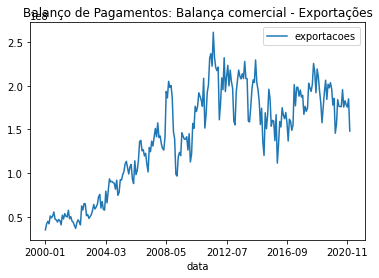

In [89]:
dados.plot(kind='line').set_title("Balanço de Pagamentos: Balança comercial - Exportações")